In [1]:
import pandas as pd
import scipy as scp
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
def simulate(bias, shape, seed) :
    scp.random.seed(seed)
    data = scp.random.binomial(1, bias, shape)
    return pd.DataFrame(data)

In [3]:
bias = 0.5

In [4]:
n = 20

In [5]:
N = 1000000

In [6]:
experiment = simulate(bias, (N, n), 2017)

In [7]:
experiment['mean'] = experiment.mean(axis = 1)

In [8]:
freqs = (experiment[[0,'mean']].groupby('mean').count() / N).reset_index().rename(columns = {0 : 'freq'})

In [9]:
def hoeffding_bound(bias, alpha, n) :
    return scp.exp(-2 * n * ((alpha - bias) ** 2))

In [10]:
def markov_bound(bias, alpha) :
    if (alpha == 0) : return scp.nan
    else : return bias / alpha

In [11]:
freqs['hoef_bound'] = freqs['mean'].apply(lambda x : hoeffding_bound(bias, x, n))

In [12]:
freqs['mark_bound'] = freqs['mean'].apply(lambda x : markov_bound(bias, x))

In [13]:
freqs = freqs[freqs['mean']>=0.5]

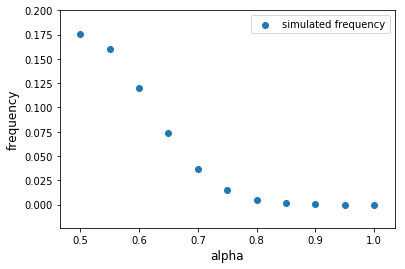

In [14]:
plt.scatter(freqs['mean'], freqs['freq'], label = 'simulated frequency')
plt.xlabel('alpha', fontsize = 'large')
plt.ylabel('frequency', fontsize = 'large')
plt.legend()
plt.savefig('fig1.jpg')

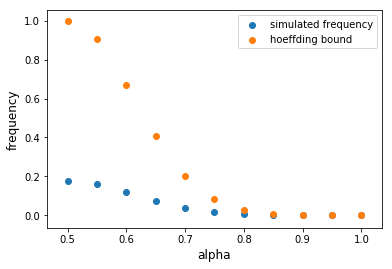

In [15]:
plt.scatter(freqs['mean'], freqs['freq'], label = 'simulated frequency')
plt.scatter(freqs['mean'], freqs['hoef_bound'], label = 'hoeffding bound')
plt.xlabel('alpha', fontsize = 'large')
plt.ylabel('frequency', fontsize = 'large')
plt.legend()
plt.savefig('fig2.jpg')

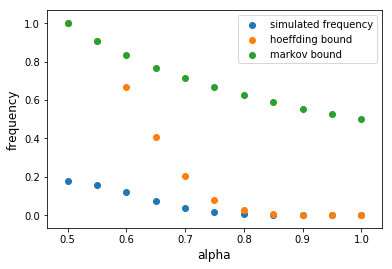

In [16]:
plt.scatter(freqs['mean'], freqs['freq'], label = 'simulated frequency')
plt.scatter(freqs['mean'], freqs['hoef_bound'], label = 'hoeffding bound')
plt.scatter(freqs['mean'], freqs['mark_bound'], label = 'markov bound')
plt.xlabel('alpha', fontsize = 'large')
plt.ylabel('frequency', fontsize = 'large')
plt.legend()
plt.savefig('fig3.jpg')

In [17]:
#Prob that alpha equals to 1:
(0.5) ** 20, hoeffding_bound(1,0.5,20)

(9.5367431640625e-07, 4.5399929762484854e-05)

In [19]:
#Prob that alpha equals to 0.95:
sts.binom(20, 0.5).pmf(1) + sts.binom(20, 0.5).pmf(0), hoeffding_bound(0.95,0.5,20)

(2.002716064453124e-05, 0.00030353913807886732)